# Regularized Linear Regression Project
-This project dataset has a lot of features related to socio demographic and health resources data by county in the United States, right before the Covid-19 pandemic started (data from 2018 and 2019).

-We want to discover if there is any relationship between health resouces and socio demographic data. Choose one target variable (related to health resources), and use the LASSO model to reduce features to the most important ones for your target.

-Find the parameters for your linear regression between your selected features and your chosen target.

### STEP 1

#### Import Libraries and Data

In [462]:
%pip install --upgrade pip
%pip install -r ../requirements.txt

5382.19s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


5389.55s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 83.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 kB 58.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
TARGET = 'ICU Beds_x'
%pip install plotly
import plotly.express as px
%pip install seaborn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

5403.94s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


5410.96s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [464]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/dataset.csv',header=0, sep=',')

### STEP 2

#### EDA

In [465]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [466]:
df_raw.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [467]:
df_raw.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [468]:
df_raw.describe(include = 'object')

,COUNTY_NAME,STATE_NAME
count,3140,3140
unique,1841,51
top,Washington,Texas
freq,31,254


In [469]:
df_raw.sample(10)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
165,5113,20049,2416,12.050476,2599,12.963240,2095,10.449399,1988,9.915707,...,1911,15.6,14.5,16.8,2422,4.1,3.8,4.4,635,6
2060,39039,38165,4558,11.942880,5213,13.659112,4640,12.157736,4588,12.021486,...,2699,12.3,11.4,13.2,3618,3.0,2.8,3.3,894,5
130,5043,18328,2141,11.681580,2526,13.782191,3060,16.695766,2015,10.994107,...,1331,13.9,13.1,14.7,2005,3.5,3.3,3.7,508,6
1896,37017,33190,3505,10.560410,3982,11.997590,3709,11.175053,3464,10.436879,...,3072,18.0,17.0,19.0,4763,4.5,4.3,4.8,1190,6
381,12127,547538,52538,9.595316,57300,10.465027,65340,11.933418,59465,10.860433,...,45373,14.1,13.1,15.1,63668,3.7,3.5,4.0,16623,3
1443,28089,105630,13829,13.091925,15332,14.514816,13258,12.551359,14263,13.502793,...,4744,10.8,10.0,11.6,8537,2.7,2.5,2.9,2131,3
1095,21209,56031,7624,13.606753,7993,14.265317,7669,13.687066,7740,13.813782,...,3631,11.1,10.2,12.0,4670,2.6,2.4,2.8,1094,3
2027,38079,14301,2743,19.180477,2485,17.376407,1752,12.250892,1664,11.635550,...,1005,18.3,17.2,19.4,1729,4.3,4.1,4.6,411,6
556,16015,7634,593,7.767881,833,10.911711,558,7.309405,667,8.737228,...,500,13.1,11.8,14.3,829,3.5,3.2,3.8,223,3
1592,29225,39109,5809,14.853359,5730,14.651359,4568,11.680176,4779,12.219694,...,3014,12.4,11.4,13.4,3530,3.3,3.0,3.6,930,3


In [470]:
df_raw.shape

(3140, 108)

/tmp/ipykernel_2333/2900242811.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


<AxesSubplot:>

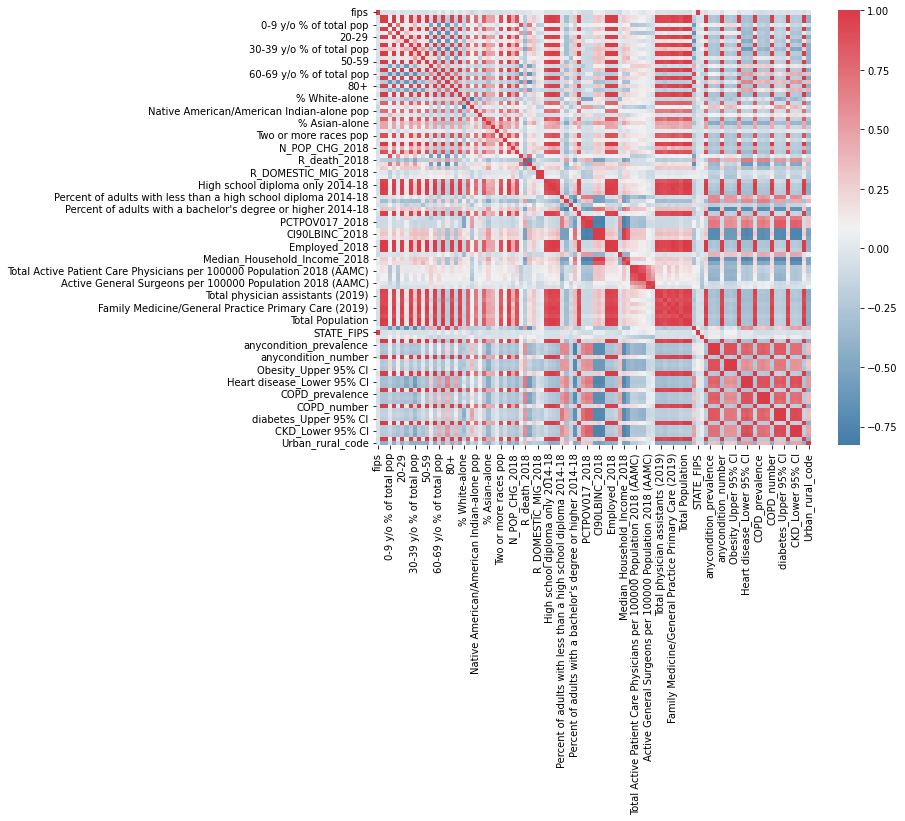

In [471]:
fig, ax = plt.subplots(figsize=(10, 8))
corr = df_raw.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [472]:
corr

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
fips,1.000000,-0.056079,-0.049580,-0.010586,-0.053130,0.018994,-0.053591,-0.030310,-0.051715,-0.045491,...,-0.063463,-0.031057,-0.036327,-0.026483,-0.056055,-0.040631,-0.044576,-0.033649,-0.062322,-0.008345
TOT_POP,-0.056079,1.000000,0.994010,0.052507,0.994596,0.023384,0.994558,0.160254,0.995526,0.295635,...,0.981495,-0.174843,-0.160621,-0.187362,0.989583,-0.218731,-0.202895,-0.230914,0.993889,-0.428608
0-9,-0.049580,0.994010,1.000000,0.085920,0.997487,0.048341,0.989992,0.161984,0.990971,0.304263,...,0.972641,-0.167495,-0.152687,-0.180585,0.984664,-0.216430,-0.200512,-0.229570,0.985337,-0.423641
0-9 y/o % of total pop,-0.010586,0.052507,0.085920,1.000000,0.074714,0.687844,0.056047,0.130136,0.058535,0.342930,...,0.034582,-0.028295,-0.005923,-0.048949,0.047539,-0.133841,-0.117138,-0.153847,0.040384,-0.050916
19-Oct,-0.053130,0.994596,0.997487,0.074714,1.000000,0.056762,0.988552,0.167605,0.987298,0.294682,...,0.973427,-0.178421,-0.163623,-0.191449,0.982778,-0.226956,-0.210885,-0.239865,0.985221,-0.431290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CKD_prevalence,-0.040631,-0.218731,-0.216430,-0.133841,-0.226956,-0.276999,-0.219593,-0.366835,-0.215739,-0.478115,...,-0.191943,0.918514,0.908023,0.925347,-0.175064,1.000000,0.995203,0.995594,-0.183045,0.471775
CKD_Lower 95% CI,-0.044576,-0.202895,-0.200512,-0.117138,-0.210885,-0.259547,-0.203506,-0.341480,-0.199999,-0.450913,...,-0.176039,0.924630,0.917499,0.928512,-0.159501,0.995203,1.000000,0.989756,-0.167424,0.454327
CKD_Upper 95% CI,-0.033649,-0.230914,-0.229570,-0.153847,-0.239865,-0.296576,-0.232199,-0.393541,-0.228048,-0.506720,...,-0.204368,0.906711,0.892914,0.916610,-0.187528,0.995594,0.989756,1.000000,-0.195052,0.489551
CKD_number,-0.062322,0.993889,0.985337,0.040384,0.985221,0.007654,0.986895,0.149367,0.985851,0.271343,...,0.991025,-0.144575,-0.131191,-0.156493,0.995536,-0.183045,-0.167424,-0.195052,1.000000,-0.416486


In [473]:
np.abs(corr[TARGET])
limit_min = 0.75
limit_max = 1
filtro = corr[TARGET][(np.abs(corr[TARGET])<limit_max)&(np.abs(corr[TARGET])>limit_min)]
print(filtro)

TOT_POP                                                 0.910824
0-9                                                     0.899842
19-Oct                                                  0.899026
20-29                                                   0.913979
30-39                                                   0.908021
40-49                                                   0.899891
50-59                                                   0.904596
60-69                                                   0.912904
70-79                                                   0.901900
80+                                                     0.897627
White-alone pop                                         0.895524
Black-alone pop                                         0.808497
Two or more races pop                                   0.791816
POP_ESTIMATE_2018                                       0.910824
GQ_ESTIMATES_2018                                       0.860321
Less than a high school d

In [474]:
df = df_raw.drop(columns=list(filtro.index))

In [475]:
df

,fips,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,...,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,Urban_rural_code
0,1001,12.206615,13.735364,12.370281,12.749771,13.636445,13.917016,10.478229,7.284042,3.622237,...,8.6,7.3,9.9,12.9,11.9,13.8,3.1,2.9,3.3,3
1,1003,11.355276,12.344167,10.814964,11.564429,12.539102,13.753658,13.728890,9.602701,4.296814,...,8.6,7.2,10.1,12.0,11.0,13.1,3.2,3.0,3.5,4
2,1005,10.980266,11.896628,13.134520,12.865239,12.354809,13.174712,12.362847,9.018930,4.212049,...,12.1,10.7,13.3,19.7,18.6,20.6,4.5,4.2,4.8,6
3,1007,10.964286,11.589286,13.522321,13.897321,13.562500,13.906250,11.361607,7.691964,3.504464,...,10.0,8.8,11.3,14.1,13.2,14.9,3.3,3.1,3.6,2
4,1009,12.266598,13.087828,11.656293,11.901798,12.921853,13.561549,12.041840,8.525242,4.036999,...,10.5,9.1,12.0,13.5,12.6,14.5,3.4,3.2,3.7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,14.178532,14.694200,12.448027,15.277229,12.389956,12.220390,11.481731,5.105572,2.204362,...,6.6,5.7,7.7,8.9,8.3,9.6,2.6,2.4,2.8,5
3136,56039,10.328842,9.466661,12.854729,17.733200,14.830380,12.685759,12.456133,6.797799,2.846497,...,4.9,4.0,6.0,7.2,6.5,8.0,2.4,2.2,2.6,5
3137,56041,15.375142,15.788955,10.606434,13.311001,11.773979,11.990738,12.581901,6.074191,2.497660,...,8.0,7.0,9.2,10.4,9.5,11.2,3.0,2.8,3.2,5
3138,56043,10.881420,14.115409,9.067850,11.452124,11.414077,13.760304,14.178821,9.397590,5.732403,...,8.3,7.1,9.6,11.3,10.3,12.1,3.4,3.2,3.7,6


## Choose 3 possible target variables
I will choose:

**Total Hospitals (2019)** 

**ICU Beds_x**

**the number of active physicians per 100,000 population in 2018**

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ICU Beds_x', ylabel='Density'>

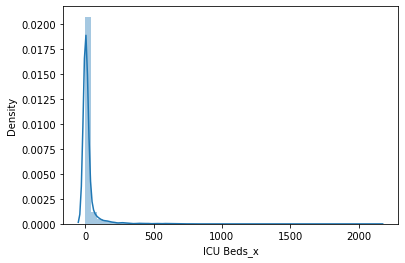

In [476]:
sns.distplot(df_raw['ICU Beds_x'])

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Specialist Physicians (2019)', ylabel='Density'>

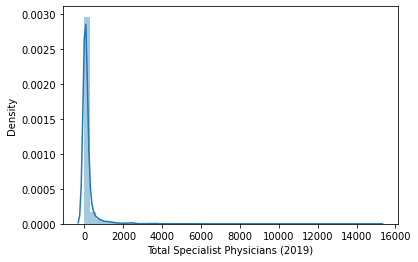

In [477]:
sns.distplot(df_raw['Total Specialist Physicians (2019)'])

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Active Physicians per 100000 Population 2018 (AAMC)', ylabel='Density'>

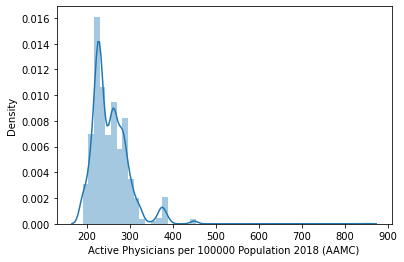

In [478]:
sns.distplot(df_raw['Active Physicians per 100000 Population 2018 (AAMC)'])

### Checking outliers

In [479]:
df_raw.duplicated().any()

False

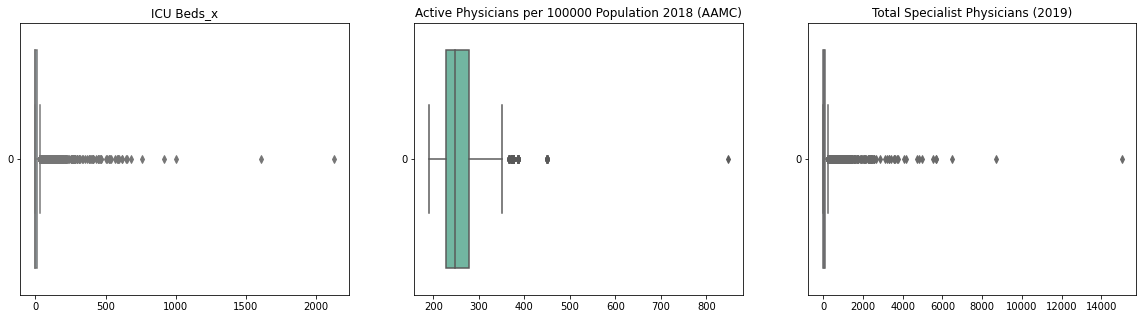

In [480]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sns.boxplot(ax=axes[0], data = df_raw['ICU Beds_x'],orient="h", palette = "Paired").set_title("ICU Beds_x")
sns.boxplot(ax=axes[1], data = df_raw['Active Physicians per 100000 Population 2018 (AAMC)'],orient="h", palette = 'Set2').set_title("Active Physicians per 100000 Population 2018 (AAMC)")
sns.boxplot(ax=axes[2], data = df_raw['Total Specialist Physicians (2019)'],orient="h", palette = 'Purples_r').set_title("Total Specialist Physicians (2019)")
plt.show()

**Relationship between the total population and the number of ICU beds, and total population vs total number of specialists per county**

<AxesSubplot:xlabel='TOT_POP', ylabel='ICU Beds_x'>

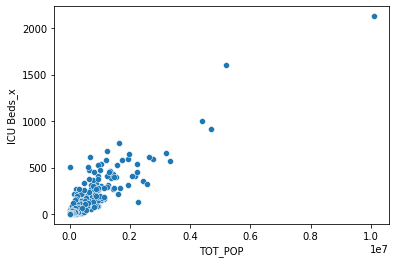

In [481]:
sns.scatterplot(data=df_raw, x='TOT_POP', y='ICU Beds_x')

<AxesSubplot:xlabel='TOT_POP', ylabel='Total Specialist Physicians (2019)'>

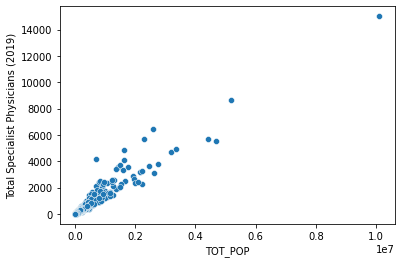

In [482]:
sns.scatterplot(data=df_raw, x='TOT_POP', y='Total Specialist Physicians (2019)')

I can see a positive correlation in both cases

<AxesSubplot:xlabel='TOT_POP', ylabel='Active Physicians per 100000 Population 2018 (AAMC)'>

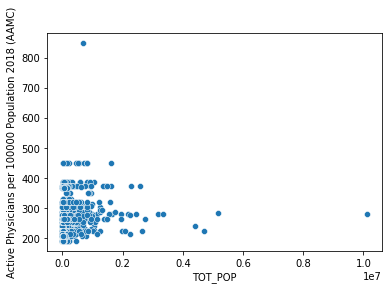

In [483]:
sns.scatterplot(data=df_raw, x='TOT_POP', y='Active Physicians per 100000 Population 2018 (AAMC)')

In [484]:
df_raw['ICU Beds_x']

0        6
1       51
2        5
3        0
4        6
        ..
3135    10
3136     6
3137     6
3138     0
3139     0
Name: ICU Beds_x, Length: 3140, dtype: int64

In [485]:
df_raw

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


I can't see a clear correlation in this case

I choose ICU Beds_x as the target variable

## Modeling

Remove all variables related to health resources from X

In [486]:
X = df_raw.drop(['CNTY_FIPS','fips','Active Physicians per 100000 Population 2018 (AAMC)','Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)','Active General Surgeons per 100000 Population 2018 (AAMC)','Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)','Total nurse practitioners (2019)','Total physician assistants (2019)','Total physician assistants (2019)','Total Hospitals (2019)','Internal Medicine Primary Care (2019)','Family Medicine/General Practice Primary Care (2019)','STATE_NAME','COUNTY_NAME','ICU Beds_x','Total Specialist Physicians (2019)'], axis=1)
y = df_raw['ICU Beds_x']

Split the dataset

In [487]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Modeling Lasso with alpha = 1

In [488]:
pipeline = make_pipeline(StandardScaler(), Lasso(alpha=1))
pipeline.fit(X_train, y_train)
print(pipeline[1].coef_, pipeline[1].intercept_)

[ 0.          0.          0.          0.         -0.          0.
 -0.          0.          1.92720309  0.         -1.02568702  0.
 -0.          0.          0.          0.         -0.          0.
  0.          0.          0.         13.80413096  0.         -0.
 -0.         -0.         -1.49487134 -0.         -0.          0.
  0.          0.         -0.         15.65482731  0.76174787  0.
  0.         -0.         -0.         -0.         -0.          0.
  0.         17.0794218  -0.60533932 -1.33119745  0.          0.04602457
  0.         -0.          0.          0.         -0.11194538 -3.04520003
 -0.          0.          0.          0.         -0.24403098 -0.
 -0.          0.          0.          0.         -0.          0.
 -0.         -0.         -0.          0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         43.86607055 -0.         -0.
 -0.          0.          0.          0.         -0.          0.
 -0.     

In [489]:
print('R2 train', pipeline.score(X_train, y_train)*100)
print('R2 test', pipeline.score(X_test, y_test)*100)

R2 train 89.26822451506497
R2 test 79.37183467217154


In [497]:
loc = [i for i, e in enumerate(pipeline[1].coef_) if e != 0]
col = X.columns
col[loc]

Index(['30-39 y/o % of total pop', '40-49 y/o % of total pop',
       'Black-alone pop', '% Asian-alone', 'GQ_ESTIMATES_2018', 'R_birth_2018',
       'Bachelor's degree or higher 2014-18',
       'Percent of adults with less than a high school diploma 2014-18',
       'Percent of adults with a high school diploma only 2014-18',
       'Percent of adults with a bachelor's degree or higher 2014-18',
       'MEDHHINC_2018', 'CI90LBINC_2018', 'Unemployment_rate_2018',
       'COPD_number'],
      dtype='object')

Finding the optimal alfa

In [508]:
from sklearn.linear_model import LassoCV
model = LassoCV(max_iter=10000)
model.fit(X_train, y_train)

LassoCV(max_iter=10000)

In [506]:
print('R2 train', model.score(X_train, y_train)*100)
print('R2 test', model.score(X_test, y_test)*100)

R2 train 88.42469760237081
R2 test 80.08105966583794


In [507]:
model.alpha_

30795.406093555568

In [509]:
pipeline = make_pipeline(StandardScaler(), Lasso(alpha=model.alpha_))
pipeline.fit(X_train, y_train)
print(pipeline[1].coef_, pipeline[1].intercept_)

[ 0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0. -0.  0.
 -0.  0. -0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.
  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0. -0. -0. -0.  0.  0.
  0.  0.  0.  0. -0.  0.  0.  0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.
 -0.] 24.63011828935396


In [510]:
loc = [i for i, e in enumerate(pipeline[1].coef_) if e != 0]
col = X.columns
col[loc]

Index([], dtype='object')

Using alfa =1

In [498]:
spector_data = X_train[["30-39 y/o % of total pop", "40-49 y/o % of total pop",
       'Black-alone pop', '% Asian-alone', 'GQ_ESTIMATES_2018', 'R_birth_2018',
       "Bachelor's degree or higher 2014-18",
       'Percent of adults with less than a high school diploma 2014-18',
       'Percent of adults with a high school diploma only 2014-18',
       "Percent of adults with a bachelor's degree or higher 2014-18",
       'MEDHHINC_2018', 'CI90LBINC_2018', 'Unemployment_rate_2018',
       'COPD_number']]
       
x_spector_data = sm.add_constant(spector_data)

# Fit and summarize OLS model
mod = sm.OLS(y_train, x_spector_data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             ICU Beds_x   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1328.
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        04:04:35   Log-Likelihood:                -10585.
No. Observations:                2198   AIC:                         2.120e+04
Df Residuals:                    2183   BIC:                         2.129e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------